# Altering the Crimestats CSV 
Data provided from two places:

Kaggle - https://www.kaggle.com/mariapushkareva/phoenix-crime-data?select=crimestat+%281%29.csv 

City of Phoenix - https://www.phoenixopendata.com/dataset/crime-data
utilizing various pandas and numpy functions.


Importing utilizing the pandas and numpy packages in Python.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Below code manually allows you to yank the crimestats.csv from your downloads folder or another folder located locally.

In [ ]:
from google.colab import files
files.upload()

Saving crimestat.csv to crimestat (1).csv


The below code allows downloading the file directly from your local.

In [ ]:
files.download('crimestat.csv')

Downloading directly from the City of Phoenix into your local machine and importing the file works despite obtaining a DtypeWarning there is no instance of rows being dropped like above.

In [ ]:
crime = pd.read_csv("crimestat.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
crime.head()

INC NUMBER        OCCURRED ON  ...    ZIP         PREMISE TYPE
0  201500002168686  11/01/2015  00:00  ...  85014          PARKING LOT
1  201500002103724  11/01/2015  00:00  ...  85031            APARTMENT
2  201600000594484  11/01/2015  00:00  ...  85006  SINGLE FAMILY HOUSE
3  201500002102327  11/01/2015  00:00  ...  85014            APARTMENT
4  201500002101405  11/01/2015  00:00  ...  85307  SINGLE FAMILY HOUSE

[5 rows x 7 columns]

This turns out to be massive file since the tail prints out all the way to row 342163....

In [ ]:
crime.tail()

INC NUMBER        OCCURRED ON  ...    ZIP                PREMISE TYPE
342358  202100000143005  01/26/2021  23:00  ...  85027      FENCED COMMERCIAL YARD
342359  202100000141859  01/26/2021  23:00  ...  85006                     VEHICLE
342360  202100000139107  01/26/2021  23:08  ...  85022  CONVENIENCE MARKET / STORE
342361  202100000139182  01/26/2021  23:30  ...  85021                     VEHICLE
342362  202100000147374  01/26/2021  23:40  ...  85339   SCHOOL-COLLEGE/UNIVERSITY

[5 rows x 7 columns]

**Assignment Notes**

You need to import this data, and make some sense of it. That might include some combination of:

1. Grouping crimes by location type or by zip code (or groups of zip codes).

2. Or, on the contrary, looking at types of crimes and where they are most common.

3. Would be good to know which areas have the fastest growing and shrinking crime rates.

Might even be worth grouping crimes by violent and non-violent?

I was curious by what kind of homes most incendences occurred and wanted to sort the values and do a value count.

In [ ]:
crime.sort_values(by='PREMISE TYPE',ascending=True)

INC NUMBER  ...                   PREMISE TYPE
237883  201900001088322  ...  ABANDONED/CONDEMNED STRUCTURE
107716  201700001191195  ...  ABANDONED/CONDEMNED STRUCTURE
202225  201900000391485  ...  ABANDONED/CONDEMNED STRUCTURE
202101  201800002220911  ...  ABANDONED/CONDEMNED STRUCTURE
210957  201900000203671  ...  ABANDONED/CONDEMNED STRUCTURE
339104  202100000040465  ...  ABANDONED/CONDEMNED STRUCTURE
155116  201800000538900  ...  ABANDONED/CONDEMNED STRUCTURE
201265  201800002194616  ...  ABANDONED/CONDEMNED STRUCTURE
268255  201900002107669  ...  ABANDONED/CONDEMNED STRUCTURE
279552  202000000190592  ...  ABANDONED/CONDEMNED STRUCTURE
171605  201900000255640  ...  ABANDONED/CONDEMNED STRUCTURE
135382  201700002150536  ...  ABANDONED/CONDEMNED STRUCTURE
154273  201800000509025  ...  ABANDONED/CONDEMNED STRUCTURE
251381  201900001546291  ...  ABANDONED/CONDEMNED STRUCTURE
124547  201800000309332  ...  ABANDONED/CONDEMNED STRUCTURE
212732  201900000262807  ...  ABANDONED/CONDEMNED STRUCTURE
314975  202000001409632  ...  ABANDONED/CONDEMNED STRUCTURE
280424  202000000219762  ...  ABANDONED/CONDEMNED STRUCTURE
228063  201900000769719  ...  ABANDONED/CONDEMNED STRUCTURE
334309  202000002022795  ...  ABANDONED/CONDEMNED STRUCTURE
136750  201700002200117  ...  ABANDONED/CONDEMNED STRUCTURE
123793  201700001746971  ...  ABANDONED/CONDEMNED STRUCTURE
178110  201800001427866  ...  ABANDONED/CONDEMNED STRUCTURE
321928  202000001648978  ...  ABANDONED/CONDEMNED STRUCTURE
177896  201800001388436  ...  ABANDONED/CONDEMNED STRUCTURE
277820  202000000141962  ...  ABANDONED/CONDEMNED STRUCTURE
240113  201900001158283  ...  ABANDONED/CONDEMNED STRUCTURE
324106  202000001718552  ...  ABANDONED/CONDEMNED STRUCTURE
208872  201900000130712  ...  ABANDONED/CONDEMNED STRUCTURE
208877  201900000130879  ...  ABANDONED/CONDEMNED STRUCTURE
...                 ...  ...                            ...
338294  202100000014831  ...                            NaN
338323  202100000015665  ...                            NaN
338324  202100000019849  ...                            NaN
338547  202100000021737  ...                            NaN
338850  202100000034835  ...                            NaN
338861  202100000032183  ...                            NaN
339013  202100000037331  ...                            NaN
339166  202100000044808  ...                            NaN
339175  202100000044848  ...                            NaN
339180  202100000047779  ...                            NaN
339202  202100000043726  ...                            NaN
339222  202100000043919  ...                            NaN
339297  202100000046442  ...                            NaN
339534  202100000054493  ...                            NaN
339760  202100000059742  ...                            NaN
339815  202100000061363  ...                            NaN
339895  202100000063272  ...                            NaN
340044  202100000072163  ...                            NaN
340204  202100000076121  ...                            NaN
340222  202100000075545  ...                            NaN
340373  202100000077534  ...                            NaN
340384  202100000081391  ...                            NaN
340511  202100000081104  ...                            NaN
340533  202100000081420  ...                            NaN
340605  202100000084918  ...                            NaN
340798  202100000088751  ...                            NaN
341695  202100000120490  ...                            NaN
341715  202100000117380  ...                            NaN
341777  202100000119799  ...                            NaN
342071  202100000128806  ...                            NaN

[342363 rows x 7 columns]

This was me double checking the data type of the columns in the data frame just incase I had to transform a variable.

In [ ]:
crime.dtypes

INC NUMBER            object
OCCURRED ON           object
OCCURRED TO           object
UCR CRIME CATEGORY    object
100 BLOCK ADDR        object
ZIP                   object
PREMISE TYPE          object
dtype: object

Because it was severely annoying to try to pull value_counts from columns with whitespaces I took the liberty of removing the whitespaces from the column titles and replaced them with an underscore hoping value_counts would work.

In [ ]:
crime.columns = crime.columns.str.replace(' ', '_') 
print(crime)

             INC_NUMBER        OCCURRED_ON  ...    ZIP                  PREMISE_TYPE
0       201500002168686  11/01/2015  00:00  ...  85014                   PARKING LOT
1       201500002103724  11/01/2015  00:00  ...  85031                     APARTMENT
2       201600000594484  11/01/2015  00:00  ...  85006           SINGLE FAMILY HOUSE
3       201500002102327  11/01/2015  00:00  ...  85014                     APARTMENT
4       201500002101405  11/01/2015  00:00  ...  85307           SINGLE FAMILY HOUSE
5       201500002102668  11/01/2015  00:00  ...  85043           SINGLE FAMILY HOUSE
6       201600000527709  11/01/2015  00:00  ...  85017                   PARKING LOT
7       201700001722914  11/01/2015  00:00  ...  85085           SINGLE FAMILY HOUSE
8       201700001603695  11/01/2015  00:00  ...  85019                      HOSPITAL
9       201600000052855  11/01/2015  00:00  ...  85029           SINGLE FAMILY HOUSE
10      201500002371588  11/01/2015  00:01  ...  85018           

Here I wanted to sort the values by two variables rather than one and eventually do a value counts.

In [ ]:
crime.sort_values(by=['UCR_CRIME_CATEGORY','PREMISE_TYPE'])

INC_NUMBER  ...                   PREMISE_TYPE
114829  201700001438721  ...  ABANDONED/CONDEMNED STRUCTURE
119341  201700001592053  ...  ABANDONED/CONDEMNED STRUCTURE
131703  201700002024523  ...  ABANDONED/CONDEMNED STRUCTURE
152140  201800000423680  ...  ABANDONED/CONDEMNED STRUCTURE
160350  201800000740969  ...  ABANDONED/CONDEMNED STRUCTURE
189283  201800001784306  ...  ABANDONED/CONDEMNED STRUCTURE
240113  201900001158283  ...  ABANDONED/CONDEMNED STRUCTURE
242603  201900001243617  ...  ABANDONED/CONDEMNED STRUCTURE
279552  202000000190592  ...  ABANDONED/CONDEMNED STRUCTURE
291959  202000000590021  ...  ABANDONED/CONDEMNED STRUCTURE
295472  202000000701680  ...  ABANDONED/CONDEMNED STRUCTURE
324106  202000001718552  ...  ABANDONED/CONDEMNED STRUCTURE
1204    201500002150175  ...       ADULT ONLY STORE / MOVIE
58145   201600001861588  ...       ADULT ONLY STORE / MOVIE
66778   201600002180336  ...       ADULT ONLY STORE / MOVIE
119280  201700001590042  ...       ADULT ONLY STORE / MOVIE
136911  201700002200262  ...       ADULT ONLY STORE / MOVIE
190293  201800001821641  ...       ADULT ONLY STORE / MOVIE
197765  201800002079285  ...       ADULT ONLY STORE / MOVIE
261161  201900001878054  ...       ADULT ONLY STORE / MOVIE
274187  202000000023764  ...       ADULT ONLY STORE / MOVIE
288638  202000000483739  ...       ADULT ONLY STORE / MOVIE
299948  202000000852365  ...       ADULT ONLY STORE / MOVIE
36801   201600001041253  ...                        AIRPORT
37503   201600001070149  ...                        AIRPORT
45259   201600001367447  ...                        AIRPORT
47354   201600001449378  ...                        AIRPORT
51091   201600001592285  ...                        AIRPORT
63391   201600002059442  ...                        AIRPORT
64666   201600002106148  ...                        AIRPORT
...                 ...  ...                            ...
341445  202100000109976  ...                        VEHICLE
341730  202100000117391  ...                        VEHICLE
342028  202100000129156  ...                        VEHICLE
75781   201700000073169  ...            WAREHOUSE / FACTORY
111231  201700001311820  ...            WAREHOUSE / FACTORY
235735  201900001014295  ...            WAREHOUSE / FACTORY
254346  201900001646787  ...            WAREHOUSE / FACTORY
341489  202100000111005  ...            WAREHOUSE / FACTORY
11908   201600000062037  ...                            NaN
14442   201600000161533  ...                            NaN
19022   201600000335558  ...                            NaN
30959   201600000807936  ...                            NaN
41343   201600001211837  ...                            NaN
41954   201600001238374  ...                            NaN
45291   201600001368154  ...                            NaN
51136   201600001593628  ...                            NaN
53242   201600001672624  ...                            NaN
54388   201600001717011  ...                            NaN
77805   201700000141217  ...                            NaN
79897   201700000209468  ...                            NaN
101414  201700000973263  ...                            NaN
114672  201700001432313  ...                            NaN
126874  201700001855384  ...                            NaN
131466  201700002016800  ...                            NaN
136981  201700002202929  ...                            NaN
161966  201800000798589  ...                            NaN
162038  201800000800878  ...                            NaN
171626  201800001152864  ...                            NaN
250426  201900001512667  ...                            NaN
276406  202000000094325  ...                            NaN

[342363 rows x 7 columns]

In [ ]:
crime.UCR_CRIME_CATEGORY.value_counts

<bound method IndexOpsMixin.value_counts of 0               LARCENY-THEFT
1                DRUG OFFENSE
2                        RAPE
3               LARCENY-THEFT
4         MOTOR VEHICLE THEFT
5         MOTOR VEHICLE THEFT
6               LARCENY-THEFT
7               LARCENY-THEFT
8                        RAPE
9         MOTOR VEHICLE THEFT
10              LARCENY-THEFT
11        MOTOR VEHICLE THEFT
12                   BURGLARY
13              LARCENY-THEFT
14              LARCENY-THEFT
15              LARCENY-THEFT
16                   BURGLARY
17                   BURGLARY
18              LARCENY-THEFT
19              LARCENY-THEFT
20              LARCENY-THEFT
21        MOTOR VEHICLE THEFT
22              LARCENY-THEFT
23              LARCENY-THEFT
24        MOTOR VEHICLE THEFT
25              LARCENY-THEFT
26              LARCENY-THEFT
27              LARCENY-THEFT
28              LARCENY-THEFT
29        MOTOR VEHICLE THEFT
                 ...         
342333           DRUG OFFE

I wanted to do a dataframe that would group by the UCR crime category since I was curious what type of incidents occurr the most. Then I constructed another frame by adding a secondary variable to see if this altered the output based on the second variable.

In [ ]:
gcrime = crime.groupby(['UCR_CRIME_CATEGORY'])
type(gcrime)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
ncrime = crime.groupby(['UCR_CRIME_CATEGORY', 'PREMISE_TYPE'])
ncrime

Checking the data frame column headers.

In [ ]:
for col in crime.columns: 
    print(col) 

INC_NUMBER
OCCURRED_ON
OCCURRED_TO
UCR_CRIME_CATEGORY
100_BLOCK_ADDR
ZIP
PREMISE_TYPE


Changing the ZIP variable from character to float since it is a bunch of numbers.

In [ ]:
crime['ZIP'] = crime['ZIP'].astype(float)

I'm not sure why value counts isn't working for a specific column of the crim dataframe, but it works after doing a groupby.

In [ ]:
crime['UCR_CRIME_CATEGORY'].value_counts

<bound method IndexOpsMixin.value_counts of 0               LARCENY-THEFT
1                DRUG OFFENSE
2                        RAPE
3               LARCENY-THEFT
4         MOTOR VEHICLE THEFT
5         MOTOR VEHICLE THEFT
6               LARCENY-THEFT
7               LARCENY-THEFT
8                        RAPE
9         MOTOR VEHICLE THEFT
10              LARCENY-THEFT
11        MOTOR VEHICLE THEFT
12                   BURGLARY
13              LARCENY-THEFT
14              LARCENY-THEFT
15              LARCENY-THEFT
16                   BURGLARY
17                   BURGLARY
18              LARCENY-THEFT
19              LARCENY-THEFT
20              LARCENY-THEFT
21        MOTOR VEHICLE THEFT
22              LARCENY-THEFT
23              LARCENY-THEFT
24        MOTOR VEHICLE THEFT
25              LARCENY-THEFT
26              LARCENY-THEFT
27              LARCENY-THEFT
28              LARCENY-THEFT
29        MOTOR VEHICLE THEFT
                 ...         
342333           DRUG OFFE

I did the same groupby as above but this time I added a counts column since it might help in a better graphical display of numbers and since value_counts decided to not work correctly above.

In [ ]:
group_counts_crime = crime.groupby(['UCR_CRIME_CATEGORY', 'PREMISE_TYPE']).size().reset_index(name='counts')
group_counts_crime

UCR_CRIME_CATEGORY                          PREMISE_TYPE  counts
0    AGGRAVATED ASSAULT         ABANDONED/CONDEMNED STRUCTURE      12
1    AGGRAVATED ASSAULT              ADULT ONLY STORE / MOVIE      11
2    AGGRAVATED ASSAULT                               AIRPORT      32
3    AGGRAVATED ASSAULT                                 ALLEY      56
4    AGGRAVATED ASSAULT                        AMUSEMENT PARK       3
5    AGGRAVATED ASSAULT                             APARTMENT    6986
6    AGGRAVATED ASSAULT   ARENA / STADIUM / CONVENTION CENTER      10
7    AGGRAVATED ASSAULT                ATM SEPARATE FROM BANK       1
8    AGGRAVATED ASSAULT              AUTO DEALERSHIP NEW/USED      17
9    AGGRAVATED ASSAULT         BANK / SAVINGS / CREDIT UNION      19
10   AGGRAVATED ASSAULT              BAR / LOUNG / NIGHT CLUB     307
11   AGGRAVATED ASSAULT                                   BUS      78
12   AGGRAVATED ASSAULT                          BUS FACILITY       5
13   AGGRAVATED ASSAULT                           BUS STATION      22
14   AGGRAVATED ASSAULT                              BUS STOP     287
15   AGGRAVATED ASSAULT                       CAMP/CAMPGROUND       5
16   AGGRAVATED ASSAULT                  CANAL / RIGHT-OF-WAY      41
17   AGGRAVATED ASSAULT                               CARPORT      26
18   AGGRAVATED ASSAULT                 CHILD CARE / DAY CARE      15
19   AGGRAVATED ASSAULT  CHURCH / SYNAGOGUE / TEMPLE / MOSQUE      41
20   AGGRAVATED ASSAULT                      COMMUNITY CENTER       6
21   AGGRAVATED ASSAULT                     CONDO / TOWNHOUSE     290
22   AGGRAVATED ASSAULT                     CONSTRUCTION SITE      11
23   AGGRAVATED ASSAULT            CONVENIENCE MARKET / STORE     646
24   AGGRAVATED ASSAULT           DEPARTMENT / DISCOUNT STORE     156
25   AGGRAVATED ASSAULT                        DRIVE-IN MOVIE       1
26   AGGRAVATED ASSAULT                              DRIVEWAY     263
27   AGGRAVATED ASSAULT                            DRUG STORE      44
28   AGGRAVATED ASSAULT                              EASEMENT       3
29   AGGRAVATED ASSAULT                       FAST FOOD STORE     209
..                  ...                                   ...     ...
642             ROBBERY                           MOBILE HOME      29
643             ROBBERY                         MOUNTAIN AREA       2
644             ROBBERY                          NURSING CARE       2
645             ROBBERY          OFFICE / COMMERCIAL BUILDING      36
646             ROBBERY                   OPEN SPACE / DESERT      26
647             ROBBERY                                 OTHER      52
648             ROBBERY                     PARK / PLAYGROUND     466
649             ROBBERY                         PARK AND RIDE       1
650             ROBBERY                        PARKING GARAGE       9
651             ROBBERY                           PARKING LOT    2145
652             ROBBERY                          RAIL STATION       1
653             ROBBERY                             RAIL STOP       1
654             ROBBERY             RENTAL STORAGE / FACILITY       2
655             ROBBERY                             REST AREA       1
656             ROBBERY                            RESTAURANT     249
657             ROBBERY                       RETAIL BUSINESS     319
658             ROBBERY                          RIVER BOTTOM       2
659             ROBBERY             SCHOOL-COLLEGE/UNIVERSITY       5
660             ROBBERY           SCHOOL-ELEMENTARY/SECONDARY      11
661             ROBBERY                         SHOPPING MALL      29
662             ROBBERY                   SINGLE FAMILY HOUSE     508
663             ROBBERY                       SPECIALTY STORE     555
664             ROBBERY           STOREROOM/SHED (COMMERCIAL)       1
665             ROBBERY   STREET / ROADWAY / ALLEY / SIDEWALK    2964
666             ROBBERY           STREET / ROADWAY / SIDEWALK     459
667            

WARNING

This plot will take a long time to load, but it looks great and displays a lot of information, it could be categorized down but it provides a great "general appearance" for the crime data.

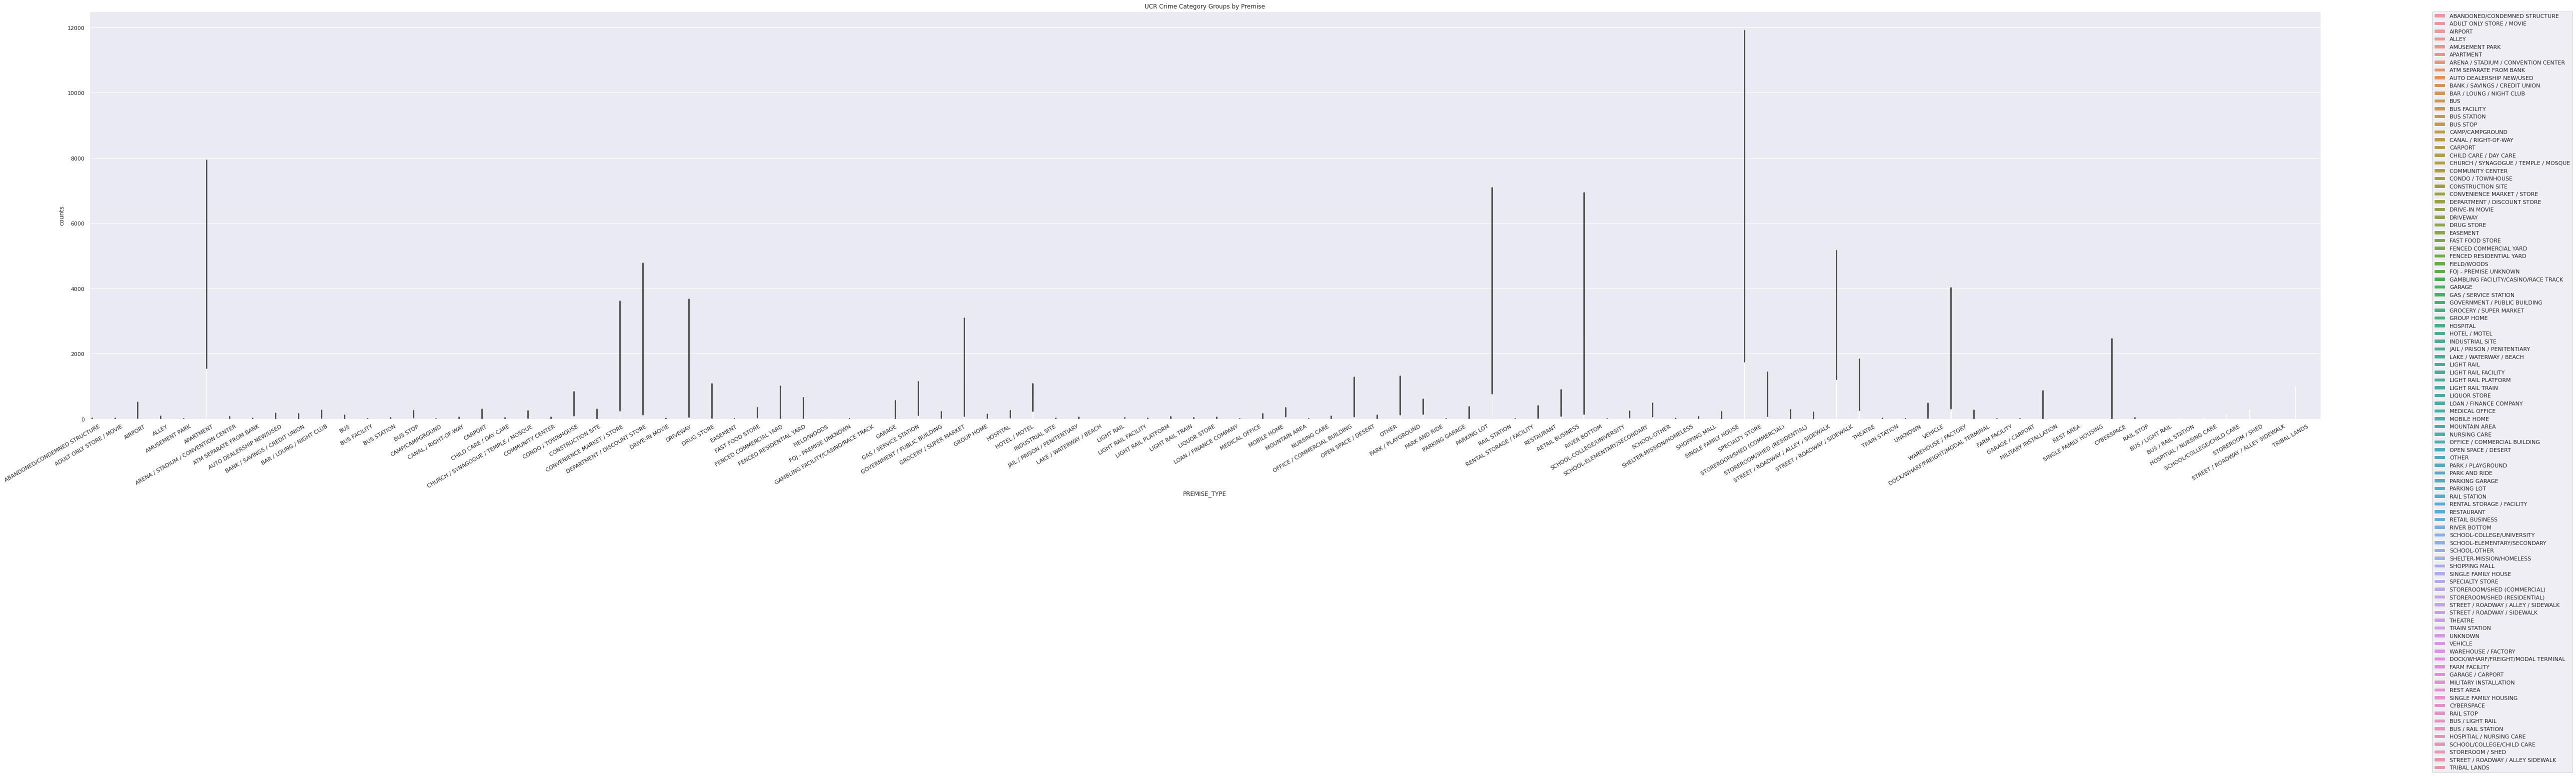

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
plt.figure(figsize=(80,15))
crime_plot = sns.barplot(data=group_counts_crime,x='PREMISE_TYPE', y='counts', hue='PREMISE_TYPE')
crime_plot.set_xticklabels(crime_plot.get_xticklabels(), rotation=30, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("UCR Crime Category Groups by Premise")
#plt.tight_layout()
plt.show()


In [ ]:
ncrime['UCR_CRIME_CATEGORY'].value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f478ab87390>>

I decided it would be interesting to focus on two different UCR_CRIME_CATEGORY after grouping by Premise type and the crime category so I decided to isolate two instances of the UCR "RAPE" category by where it occurred or "Premise_TYPE" and combine the results into a single dataframe for graphing.

In [ ]:
rape = gcrime.get_group('RAPE')
rape

INC_NUMBER  ...                         PREMISE_TYPE
2       201600000594484  ...                  SINGLE FAMILY HOUSE
8       201700001603695  ...                             HOSPITAL
37      201500002133436  ...                  SINGLE FAMILY HOUSE
56      201500002108029  ...                  SINGLE FAMILY HOUSE
63      201600000410761  ...                  SINGLE FAMILY HOUSE
70      201900000171681  ...         OFFICE / COMMERCIAL BUILDING
157     201500002113992  ...                            APARTMENT
180     201500002120749  ...                          PARKING LOT
289     201500002112365  ...                            APARTMENT
312     201500002113962  ...                            APARTMENT
342     201500002117953  ...                  SINGLE FAMILY HOUSE
469     201500002137798  ...                               GARAGE
476     201500002328015  ...                  SINGLE FAMILY HOUSE
564     201500002122967  ...                  SINGLE FAMILY HOUSE
600     201500002124642  ...                  SINGLE FAMILY HOUSE
643     201500002126738  ...                          PARKING LOT
796     201500002150885  ...                            APARTMENT
863     201500002128585  ...                           GROUP HOME
875     201500002152746  ...                         NURSING CARE
919     201500002138670  ...                  SINGLE FAMILY HOUSE
958     201500002145947  ...                              VEHICLE
1152    201500002148746  ...                            APARTMENT
1165    201500002148780  ...                            APARTMENT
1234    201500002157349  ...                              VEHICLE
1255    201510000016419  ...  STREET / ROADWAY / ALLEY / SIDEWALK
1310    201500002159899  ...                                  NaN
1407    201510000016565  ...                            APARTMENT
1443    201500002176956  ...                            APARTMENT
1458    201500002160788  ...                            APARTMENT
1550    201500002166444  ...                            APARTMENT
...                 ...  ...                                  ...
339620  202100000056092  ...          STREET / ROADWAY / SIDEWALK
339697  202100000061588  ...                  SINGLE FAMILY HOUSE
339806  202100000060918  ...          STREET / ROADWAY / SIDEWALK
339817  202100000061115  ...                  SINGLE FAMILY HOUSE
339865  202100000062467  ...                            APARTMENT
339874  202100000065424  ...                  SINGLE FAMILY HOUSE
339878  202100000065913  ...                              UNKNOWN
340220  202100000072736  ...                            APARTMENT
340352  202100000076751  ...                            APARTMENT
340371  202100000077505  ...                  SINGLE FAMILY HOUSE
340379  202100000140374  ...                FOJ - PREMISE UNKNOWN
340611  202100000085149  ...                            APARTMENT
340729  202100000088582  ...                            APARTMENT
340746  202100000093472  ...                  SINGLE FAMILY HOUSE
340814  202100000089233  ...                            APARTMENT
341217  202100000104036  ...                  SINGLE FAMILY HOUSE
341440  202100000120216  ...                            APARTMENT
341487  202100000110951  ...                              UNKNOWN
341501  202100000112271  ...                            APARTMENT
341720  202100000120780  ...                             HOSPITAL
341732  202100000125769  ...          STREET / ROADWAY / SIDEWALK
341743  202100000117888  ...                            APARTMENT
341867  202100000126202  ...                  SINGLE FAMILY HOUSE
342024  202100000132537  ...                              VEHICLE
342032  202100000129004  ...          SCHOOL-ELEMENTARY/SECONDARY
342096  202100000133159  ...             BAR / LOUNG / NIGHT CLUB
342175  202100000133843  ...          STREET / ROADWAY / SIDEWALK
342177  202100000137957  ...                              VEHICLE
342186  202100000137860  ...          STREET / ROADWA

In [ ]:
s_home_rape = ncrime.get_group(('RAPE', 'SINGLE FAMILY HOUSE'))
s_home_rape.count()

INC_NUMBER            1504
OCCURRED_ON           1502
OCCURRED_TO           1068
UCR_CRIME_CATEGORY    1504
100_BLOCK_ADDR        1504
ZIP                   1504
PREMISE_TYPE          1504
dtype: int64

In [ ]:
a_home_rape = ncrime.get_group(('RAPE', 'APARTMENT'))
a_home_rape.count()

INC_NUMBER            1299
OCCURRED_ON           1298
OCCURRED_TO            939
UCR_CRIME_CATEGORY    1299
100_BLOCK_ADDR        1299
ZIP                   1298
PREMISE_TYPE          1299
dtype: int64

Using vertical_stack I concatenated the two RAPE dataframes into one below.

In [ ]:
vertical_stack = pd.concat([s_home_rape, a_home_rape], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([s_home_rape, a_home_rape], axis=1)

In [ ]:
vertical_stack

INC_NUMBER        OCCURRED_ON  ...      ZIP         PREMISE_TYPE
2       201600000594484  11/01/2015  00:00  ...  85006.0  SINGLE FAMILY HOUSE
37      201500002133436  11/01/2015  04:00  ...  85033.0  SINGLE FAMILY HOUSE
56      201500002108029  11/01/2015  09:00  ...  85019.0  SINGLE FAMILY HOUSE
63      201600000410761  11/01/2015  10:00  ...  85033.0  SINGLE FAMILY HOUSE
342     201500002117953  11/03/2015  03:00  ...  85051.0  SINGLE FAMILY HOUSE
476     201500002328015  11/03/2015  20:00  ...  85043.0  SINGLE FAMILY HOUSE
564     201500002122967  11/04/2015  11:26  ...  85032.0  SINGLE FAMILY HOUSE
600     201500002124642  11/04/2015  15:30  ...  85015.0  SINGLE FAMILY HOUSE
919     201500002138670  11/06/2015  16:00  ...  85033.0  SINGLE FAMILY HOUSE
1677    201600000261893  11/11/2015  12:00  ...  85040.0  SINGLE FAMILY HOUSE
1796    201500002187339  11/12/2015  00:00  ...  85035.0  SINGLE FAMILY HOUSE
2119    201500002188258  11/14/2015  01:30  ...  85033.0  SINGLE FAMILY HOUSE
2488    201500002201273  11/16/2015  10:12  ...  85041.0  SINGLE FAMILY HOUSE
2965    201700001112653  11/19/2015  12:00  ...  85022.0  SINGLE FAMILY HOUSE
3174    201500002235208  11/20/2015  16:00  ...  85040.0  SINGLE FAMILY HOUSE
4282    201500002270714  11/27/2015  01:45  ...  85339.0  SINGLE FAMILY HOUSE
4865    201500002305762  11/30/2015  23:00  ...  85045.0  SINGLE FAMILY HOUSE
4876    201700001926007  12/01/2015  00:00  ...  85029.0  SINGLE FAMILY HOUSE
4886    201600000636501  12/01/2015  00:01  ...  85363.0  SINGLE FAMILY HOUSE
4918    201600000644357  12/01/2015  08:00  ...  85009.0  SINGLE FAMILY HOUSE
5587    202100000035470  12/05/2015  00:00  ...  85037.0  SINGLE FAMILY HOUSE
5612    201600000024178  12/05/2015  03:00  ...  85048.0  SINGLE FAMILY HOUSE
5673    201500002389690  12/05/2015  14:30  ...  85029.0  SINGLE FAMILY HOUSE
6724    201500002361953  12/11/2015  17:59  ...  85035.0  SINGLE FAMILY HOUSE
6869    201500002366962  12/12/2015  14:03  ...  85048.0  SINGLE FAMILY HOUSE
7436    201500002388192  12/15/2015  23:30  ...  85009.0  SINGLE FAMILY HOUSE
7460    201500002393669  12/16/2015  06:45  ...  85053.0  SINGLE FAMILY HOUSE
7722    201500002430482  12/17/2015  18:00  ...  85053.0  SINGLE FAMILY HOUSE
7981    201700000781884  12/19/2015  00:01  ...  85035.0  SINGLE FAMILY HOUSE
8677    201500002462926  12/22/2015  17:30  ...  85033.0  SINGLE FAMILY HOUSE
...                 ...                ...  ...      ...                  ...
333034  202000002029139  12/06/2020  19:30  ...  85006.0            APARTMENT
333103  202000002088757  12/07/2020  00:45  ...  85015.0            APARTMENT
334384  202000002025259  12/13/2020  22:26  ...  85007.0            APARTMENT
334417  202000002025788  12/14/2020  01:22  ...  85051.0            APARTMENT
334608  202000002045539  12/15/2020  00:00  ...  85018.0            APARTMENT
334813  202000002075478  12/16/2020  01:00  ...  85023.0            APARTMENT
335671  202100000172107  12/20/2020  12:00  ...  85035.0            APARTMENT
336374  202000002080235  12/23/2020  23:00  ...  85006.0            APARTMENT
336375  202000002110450  12/23/2020  23:00  ...  85019.0            APARTMENT
336806  202100000105867  12/26/2020  15:00  ...  85029.0            APARTMENT
337131  202000002103430  12/28/2020  06:00  ...  85023.0            APARTMENT
337154  202000002101829  12/28/2020  10:02  ...  85021.0            APARTMENT
337298  202000002108569  12/29/2020  01:30  ...  85020.0            APARTMENT
337390  202000002112621  12/29/2020  18:00  ...  85017.0            APARTMENT
338162  202100000014746  01/03/2021  00:30  ...  85013.0            APARTMENT
338284  202100000014183  01/03/2021  19:33  ...  85032.0            APARTMENT
338461  202100000019466  01/04/2021  18:58  ...  85023.0            APARTMENT
338840  202100000092524  01/06/2021  22:00  ...  85015.0            APARTMENT
339107  202100000043068  01/08/2021  16:30  ...  85014.0            APARTMENT
339417  202100000050101  01/10/2021

I wouldn't recommend the horizontal stack for merging the two groupby data frames that look at the "RAPE" category, it makes it a bit of mess to look at.

In [ ]:
horizontal_stack #do not use

INC_NUMBER        OCCURRED_ON  ...      ZIP PREMISE_TYPE
2       201600000594484  11/01/2015  00:00  ...      NaN          NaN
37      201500002133436  11/01/2015  04:00  ...      NaN          NaN
56      201500002108029  11/01/2015  09:00  ...      NaN          NaN
63      201600000410761  11/01/2015  10:00  ...      NaN          NaN
157                 NaN                NaN  ...  85015.0    APARTMENT
289                 NaN                NaN  ...  85029.0    APARTMENT
312                 NaN                NaN  ...  85034.0    APARTMENT
342     201500002117953  11/03/2015  03:00  ...      NaN          NaN
476     201500002328015  11/03/2015  20:00  ...      NaN          NaN
564     201500002122967  11/04/2015  11:26  ...      NaN          NaN
600     201500002124642  11/04/2015  15:30  ...      NaN          NaN
796                 NaN                NaN  ...  85008.0    APARTMENT
919     201500002138670  11/06/2015  16:00  ...      NaN          NaN
1152                NaN                NaN  ...  85014.0    APARTMENT
1165                NaN                NaN  ...  85006.0    APARTMENT
1407                NaN                NaN  ...  85301.0    APARTMENT
1443                NaN                NaN  ...  85008.0    APARTMENT
1458                NaN                NaN  ...  85021.0    APARTMENT
1550                NaN                NaN  ...  85035.0    APARTMENT
1677    201600000261893  11/11/2015  12:00  ...      NaN          NaN
1796    201500002187339  11/12/2015  00:00  ...      NaN          NaN
2119    201500002188258  11/14/2015  01:30  ...      NaN          NaN
2134                NaN                NaN  ...  85013.0    APARTMENT
2163                NaN                NaN  ...  85027.0    APARTMENT
2296                NaN                NaN  ...  85033.0    APARTMENT
2323                NaN                NaN  ...  85043.0    APARTMENT
2457                NaN                NaN  ...  85019.0    APARTMENT
2480                NaN                NaN  ...  85035.0    APARTMENT
2488    201500002201273  11/16/2015  10:12  ...      NaN          NaN
2563                NaN                NaN  ...  85051.0    APARTMENT
...                 ...                ...  ...      ...          ...
337298              NaN                NaN  ...  85020.0    APARTMENT
337390              NaN                NaN  ...  85017.0    APARTMENT
337683  202100000138683  12/31/2020  07:00  ...      NaN          NaN
338008  202100000013925  01/02/2021  01:00  ...      NaN          NaN
338162              NaN                NaN  ...  85013.0    APARTMENT
338284              NaN                NaN  ...  85032.0    APARTMENT
338461              NaN                NaN  ...  85023.0    APARTMENT
338840              NaN                NaN  ...  85015.0    APARTMENT
339107              NaN                NaN  ...  85014.0    APARTMENT
339350  202100000048010  01/10/2021  01:00  ...      NaN          NaN
339417              NaN                NaN  ...  85006.0    APARTMENT
339504  202100000059543  01/10/2021  22:30  ...      NaN          NaN
339529              NaN                NaN  ...  85021.0    APARTMENT
339697  202100000061588  01/12/2021  00:00  ...      NaN          NaN
339817  202100000061115  01/12/2021  16:50  ...      NaN          NaN
339865              NaN                NaN  ...  85021.0    APARTMENT
339874  202100000065424  01/13/2021  00:00  ...      NaN          NaN
340220              NaN                NaN  ...  85014.0    APARTMENT
340352              NaN                NaN  ...  85017.0    APARTMENT
340371  202100000077505  01/15/2021  23:53  ...      NaN          NaN
340611              NaN                NaN  ...  85017.0    APARTMENT
340729              NaN                NaN  ...  85017.0    APARTMENT
340746  202100000093472  01/17/2021  22:00  ...      NaN          NaN
340814              NaN                NaN  ...  85015.0    APARTMENT
341217  202100000104036  01/20/2021  15:00  ...      NaN          NaN
341440              NaN

Out of boredom, below I decided to use two different seaborn graphs to see how the RAPE category based on PREMISE TYPE would turn out. It appears you're not much safer in a single family house than you are in an apartment. My main conclusion is that there "might not be enough data" since it isn't mentioned how many individuals are residing in the "Single family home" at the time of the attack, not sure if that matters though.

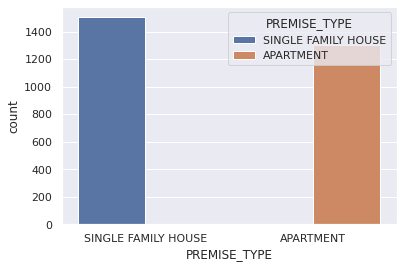

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=vertical_stack,x='PREMISE_TYPE',hue='PREMISE_TYPE')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [ ]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [ ]:
cf.go_offline()

In [ ]:
init_notebook_mode(connected=False)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

https://stackoverflow.com/questions/52859983/interactive-matplotlib-figures-in-google-colab

In [ ]:
configure_plotly_browser_state()
vertical_stack.iplot(kind='line',x=['PREMISE_TYPE', 'UCR_CRIME_CATEGORY'],y='OCCURRED_ON', color=['white', 'gold'], 
theme='solar', mode='markers+lines',title='Annual Rainfall in the city Peachtree City, GA')
plt.show()

In [ ]:
configure_plotly_browser_state()
vertical_stack.iplot(kind='line',x='OCCURRED_ON',y=['PREMISE_TYPE', 'UCR_CRIME_CATEGORY'], color=['white', 'gold'], 
theme='solar', mode='markers+lines',title='Annual Rainfall in the city Peachtree City, GA')
plt.show()

In [ ]:
vertical_stack.head()


INC_NUMBER        OCCURRED_ON  ...      ZIP         PREMISE_TYPE
2    201600000594484  11/01/2015  00:00  ...  85006.0  SINGLE FAMILY HOUSE
37   201500002133436  11/01/2015  04:00  ...  85033.0  SINGLE FAMILY HOUSE
56   201500002108029  11/01/2015  09:00  ...  85019.0  SINGLE FAMILY HOUSE
63   201600000410761  11/01/2015  10:00  ...  85033.0  SINGLE FAMILY HOUSE
342  201500002117953  11/03/2015  03:00  ...  85051.0  SINGLE FAMILY HOUSE

[5 rows x 7 columns]

In [ ]:
vertical_stack['ZIP'].value_counts()

85008.0    164
85029.0    118
85017.0    112
85006.0    108
85015.0    107
85009.0    102
85051.0    101
85033.0    100
85041.0     95
85032.0     95
85021.0     88
85037.0     79
85020.0     74
85035.0     73
85023.0     73
85042.0     73
85013.0     70
85014.0     66
85003.0     65
85022.0     64
85019.0     64
85016.0     64
85339.0     64
85027.0     59
85007.0     59
85043.0     59
85031.0     58
85040.0     57
85053.0     54
85018.0     53
          ... 
85012.0     15
85054.0     13
85331.0     12
85024.0     11
85304.0     10
85306.0     10
85028.0     10
85085.0      9
85307.0      7
85045.0      7
85086.0      6
85083.0      6
85202.0      6
85301.0      4
85251.0      3
85303.0      2
85323.0      2
85255.0      2
85302.0      2
85210.0      2
85087.0      2
85297.0      1
85295.0      1
85282.0      1
85363.0      1
85225.0      1
85224.0      1
85201.0      1
85338.0      1
85382.0      1
Name: ZIP, Length: 69, dtype: int64

This is apparently a "categorical plot" not much different than the previous but it's likely missing some components for its presentation.

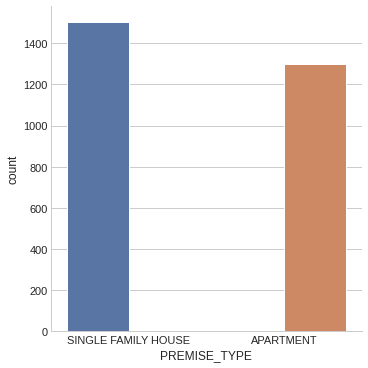

<Figure size 1080x864 with 0 Axes>

In [ ]:
sns.catplot(data=vertical_stack,kind='count',x='PREMISE_TYPE',hue='PREMISE_TYPE')
plt.figure(figsize=(15, 12))

plt.show()

From my curiosity I aggregated the crime data based on the UCR crime category and the premise type and then isolated two premise types based on the UCR crime category of "RAPE" since my family often warned me about living by myself. This does not get my hopes up, but it is probably very different based on location. Regardless I guess I should start carrying pepper spray and have a home security system when I move out.

# Essentials Description


**Essentials**

Once you hold the basics badge you may choose add to this work to attain the "essentials" level of this badge to do so, you should add more data to reach new kinds of conclusions. At a minimum, this should:

Draw on multiple sources of data and see how it intersects with the crime data. There are tons of sources you might draw from: housing sales, car traffic, weather, etc.
There should be a minimum of one additional data source, and there must be at least one data source that is not CSV.

You should produce, at minimum, one scatter plot and one bar chart.
You may, if you like, explore some regressions. It would be good practice. It is not, however, strictly required.

Store a resulting data set as a CSV. The CSV may be placed in a dropbox, Google Drive, or elsewhere (so as not to use up space on your Github account). Make sure you clearly differentiate your notebook as being for module 3 essentials, so that there is no confusion between this work and the work for basics. There is no quiz for this one. You need to have successfully completed the "basics" level and the "essentials" project on top of this. Make sure the two outcomes are separate sets of files (though, of course, the latter may build on the former). Provide your link by clicking below.

# Essentials Project

For the Essentials project I pulled two files from two different locations that display population based on Zip code for Arizona (it was a massive pain in the butt trying to find data that also included things like car crashes and demographics) so I just stuck with population to see if incident occurrences had to do with population / population density. 

Since there were two datasets one from this random ebsite and another that pulled data from the U.S. Census I thought it might be interested to see how both would turn out.

Both datasets were not "downloadable" or the website didn't offer downloading so I copy pasted into an Excel file and made sure the data didn't have anything weird before converting both to CSV.

https://www.arizona-demographics.com/zip_codes_by_population

In [ ]:
from google.colab import files
files.upload() #File is called "Arizona_Zip_Codes_Population.csv"

Saving Arizona_Zip_Codes_Population.csv to Arizona_Zip_Codes_Population (1).csv


{'Arizona_Zip_Codes_Population.csv': b'\xef\xbb\xbfZip Code,Population\r\n85364,74333 \r\n85032,73203 \r\n85142,71423 \r\n85225,70356 \r\n85301,68579 \r\n85204,67924 \r\n85281,66833 \r\n85308,66706 \r\n85033,64832 \r\n85326,63317 \r\n85008,62340 \r\n85041,62152 \r\n85035,59660 \r\n85122,58724 \r\n85345,57351 \r\n85705,56314 \r\n85706,55755 \r\n85282,55664 \r\n85383,55327 \r\n85037,54817 \r\n85710,54489 \r\n85201,54110 \r\n85022,51920 \r\n85009,51711 \r\n85283,51495 \r\n85365,50865 \r\n85338,50122 \r\n85207,49863 \r\n85234,49056 \r\n85719,48854 \r\n85374,48430 \r\n85339,47958 \r\n85042,47957 \r\n85295,47791 \r\n85379,47663 \r\n85713,47272 \r\n85140,47244 \r\n85254,47185 \r\n85029,47080 \r\n86001,45695 \r\n85746,45521 \r\n85051,45313 \r\n85286,44885 \r\n85296,44564 \r\n85323,43968 \r\n85255,43956 \r\n85224,43834 \r\n85021,43378 \r\n85205,43135 \r\n85353,42801 \r\n85756,42749 \r\n85017,42656 \r\n85086,42179 \r\n85015,41895 \r\n85044,41746 \r\n85209,41407 \r\n85251,41102 \r\n85210,41073 \r

http://www.usa.com/rank/arizona-state--population-density--zip-code-rank.htm?hl=&hlst=&wist=&yr=&dis=&sb=DESC&plow=&phigh=&ps=

Did not end up using the USA.com, it was there incase there were issues with the previous URL csv.

In [ ]:
from google.colab import files
files.upload() #File is called USA.com_Arizona_Population_Density_Zip.csv

Saving USA.com_Arizona_Population_Density_Zip.csv to USA.com_Arizona_Population_Density_Zip (1).csv


{'USA.com_Arizona_Population_Density_Zip.csv': b'\xef\xbb\xbfRank,Population Density \xe2\x96\xbc,Zip / Population\r\n1,"10,249.0/sq mi","86011\xc2\xa0/ 6,950"\r\n2,"9,629.6/sq mi","85033\xc2\xa0/ 58,799"\r\n3,"9,568.3/sq mi","85035\xc2\xa0/ 54,668"\r\n4,"8,115.3/sq mi","85015\xc2\xa0/ 39,719"\r\n5,"7,682.3/sq mi","85017\xc2\xa0/ 40,333"\r\n6,"6,885.7/sq mi","85019\xc2\xa0/ 25,866"\r\n7,"6,879.6/sq mi","85031\xc2\xa0/ 27,980"\r\n8,"6,801.2/sq mi","85301\xc2\xa0/ 63,060"\r\n9,"6,780.8/sq mi","85006\xc2\xa0/ 26,473"\r\n10,"6,757.1/sq mi","85051\xc2\xa0/ 43,022"\r\n11,"6,333.9/sq mi","85204\xc2\xa0/ 62,767"\r\n12,"6,281.6/sq mi","85302\xc2\xa0/ 38,334"\r\n13,"5,962.2/sq mi","85014\xc2\xa0/ 24,979"\r\n14,"5,950.2/sq mi",85654\xc2\xa0/ 366\r\n15,"5,903.8/sq mi","85210\xc2\xa0/ 38,908"\r\n16,"5,788.8/sq mi","85037\xc2\xa0/ 47,465"\r\n17,"5,741.0/sq mi","85032\xc2\xa0/ 71,347"\r\n18,"5,656.4/sq mi","85225\xc2\xa0/ 72,300"\r\n19,"5,617.3/sq mi","85202\xc2\xa0/ 36,024"\r\n20,"5,493.0/sq mi","85

Below I was attempting to isolate the ZIP column as well as see its individual counts for each year from 2015 to 2020, however, I was having difficulty isolating by year.

In [ ]:
crime['ZIP'].value_counts()

85015.0    17484
85008.0    16145
85009.0    15332
85051.0    15296
85041.0    15070
85017.0    13968
85035.0    12944
85043.0    12333
85021.0    11538
85033.0    11156
85029.0    10479
85032.0    10260
85023.0    10221
85040.0     9858
85016.0     9530
85042.0     9339
85022.0     8686
85031.0     8307
85019.0     8016
85037.0     7934
85034.0     7347
85020.0     7180
85013.0     6954
85006.0     6880
85027.0     6607
85339.0     6187
85018.0     6163
85007.0     5922
85014.0     5903
85053.0     5062
           ...  
85335.0        3
85326.0        3
85208.0        3
85206.0        3
85286.0        3
85363.0        3
85234.0        3
85297.0        3
85204.0        3
85388.0        2
85233.0        2
85381.0        2
85374.0        2
85250.0        2
85248.0        2
85295.0        2
85262.0        1
85337.0        1
85203.0        1
85340.0        1
85212.0        1
85351.0        1
85355.0        1
85290.0        1
85284.0        1
85239.0        1
85209.0        1
85268.0       

In [ ]:
dates = crime['OCCURRED_ON'].value_counts()
dates

04/01/2019  00:00    61
01/01/2020  00:00    53
08/01/2019  00:00    51
03/01/2020  00:00    51
07/01/2019  00:00    46
01/01/2019  00:00    46
06/01/2019  00:00    45
07/01/2018  00:00    44
02/01/2020  00:00    42
12/01/2019  00:00    42
10/01/2019  00:00    41
01/03/2019  00:00    39
05/01/2019  00:00    39
01/01/2016  00:00    38
11/01/2018  00:00    38
11/01/2019  00:00    37
03/01/2019  00:00    37
12/01/2018  00:00    36
03/01/2018  00:00    36
01/01/2017  00:00    36
09/01/2019  00:00    35
01/01/2018  00:00    35
04/30/2020  00:00    35
06/01/2018  00:00    34
10/01/2018  00:00    33
06/01/2017  00:00    33
03/24/2020  00:00    33
02/01/2019  00:00    32
05/01/2020  00:00    32
12/18/2019  00:00    31
                     ..
06/18/2017  14:30     1
12/13/2018  18:03     1
10/30/2017  01:17     1
05/19/2016  05:10     1
11/28/2017  18:58     1
12/11/2017  04:50     1
03/26/2017  03:15     1
03/12/2017  10:30     1
12/23/2018  11:27     1
09/28/2019  14:59     1
04/22/2017  12:0

In [ ]:
crime['date_count'] = crime.OCCURRED_ON.map(crime.groupby('OCCURRED_ON').size())
crime['date_count']
print(crime['date_count'])

0         10.0
1         10.0
2         10.0
3         10.0
4         10.0
5         10.0
6         10.0
7         10.0
8         10.0
9         10.0
10        14.0
11        14.0
12        14.0
13        14.0
14        14.0
15        14.0
16        14.0
17        14.0
18        14.0
19        14.0
20        14.0
21        14.0
22        14.0
23        14.0
24         1.0
25         1.0
26         2.0
27         2.0
28         1.0
29         1.0
          ... 
342333     1.0
342334     6.0
342335     6.0
342336     6.0
342337     6.0
342338     6.0
342339     6.0
342340     1.0
342341     1.0
342342     1.0
342343     1.0
342344     1.0
342345     1.0
342346     1.0
342347     1.0
342348     1.0
342349     1.0
342350     2.0
342351     2.0
342352     4.0
342353     4.0
342354     4.0
342355     4.0
342356     1.0
342357     1.0
342358     2.0
342359     2.0
342360     1.0
342361     1.0
342362     1.0
Name: date_count, Length: 342363, dtype: float64


In [ ]:
crime['type_count'] = crime.OCCURRED_ON.map(crime.groupby('ZIP').size())
crime['type_count']
print(crime['type_count'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
          ..
342333   NaN
342334   NaN
342335   NaN
342336   NaN
342337   NaN
342338   NaN
342339   NaN
342340   NaN
342341   NaN
342342   NaN
342343   NaN
342344   NaN
342345   NaN
342346   NaN
342347   NaN
342348   NaN
342349   NaN
342350   NaN
342351   NaN
342352   NaN
342353   NaN
342354   NaN
342355   NaN
342356   NaN
342357   NaN
342358   NaN
342359   NaN
342360   NaN
342361   NaN
342362   NaN
Name: type_count, Length: 342363, dtype: float64


In [ ]:
crime['OCCURRED_ON'] = '2020'

In [ ]:
crime.head(30)

INC_NUMBER OCCURRED_ON  ... date_count type_count
0   201500002168686        2020  ...       10.0        NaN
1   201500002103724        2020  ...       10.0        NaN
2   201600000594484        2020  ...       10.0        NaN
3   201500002102327        2020  ...       10.0        NaN
4   201500002101405        2020  ...       10.0        NaN
5   201500002102668        2020  ...       10.0        NaN
6   201600000527709        2020  ...       10.0        NaN
7   201700001722914        2020  ...       10.0        NaN
8   201700001603695        2020  ...       10.0        NaN
9   201600000052855        2020  ...       10.0        NaN
10  201500002371588        2020  ...       14.0        NaN
11  201600000042041        2020  ...       14.0        NaN
12  201600000223791        2020  ...       14.0        NaN
13  201600002077992        2020  ...       14.0        NaN
14  201500002102481        2020  ...       14.0        NaN
15  201500002102467        2020  ...       14.0        NaN
16  201500002326780        2020  ...       14.0        NaN
17  201500002102534        2020  ...       14.0        NaN
18  201500002391368        2020  ...       14.0        NaN
19  201600000575804        2020  ...       14.0        NaN
20  201500002147335        2020  ...       14.0        NaN
21  201500002334281        2020  ...       14.0        NaN
22  201600000090387        2020  ...       14.0        NaN
23  201600000623876        2020  ...       14.0        NaN
24  201500002100158        2020  ...        1.0        NaN
25  201500002101675        2020  ...        1.0        NaN
26  201500002103050        2020  ...        2.0        NaN
27  201500002103663        2020  ...        2.0        NaN
28  201500002119698        2020  ...        1.0        NaN
29  201500002101758        2020  ...        1.0        NaN

[30 rows x 9 columns]

In [ ]:
crime.shape

(342363, 9)

In [ ]:
crime.ndim

2

In [ ]:
crime.size

3081267

Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from io import StringIO

import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
crime_2 = pd.read_csv("crimestat.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
crime_2.columns = crime_2.columns.str.replace(' ', '_') 
crime_2

INC_NUMBER        OCCURRED_ON  ...    ZIP                  PREMISE_TYPE
0       201500002168686  11/01/2015  00:00  ...  85014                   PARKING LOT
1       201500002103724  11/01/2015  00:00  ...  85031                     APARTMENT
2       201600000594484  11/01/2015  00:00  ...  85006           SINGLE FAMILY HOUSE
3       201500002102327  11/01/2015  00:00  ...  85014                     APARTMENT
4       201500002101405  11/01/2015  00:00  ...  85307           SINGLE FAMILY HOUSE
5       201500002102668  11/01/2015  00:00  ...  85043           SINGLE FAMILY HOUSE
6       201600000527709  11/01/2015  00:00  ...  85017                   PARKING LOT
7       201700001722914  11/01/2015  00:00  ...  85085           SINGLE FAMILY HOUSE
8       201700001603695  11/01/2015  00:00  ...  85019                      HOSPITAL
9       201600000052855  11/01/2015  00:00  ...  85029           SINGLE FAMILY HOUSE
10      201500002371588  11/01/2015  00:01  ...  85018                      HOSPITAL
11      201600000042041  11/01/2015  00:01  ...  85254             CONDO / TOWNHOUSE
12      201600000223791  11/01/2015  00:01  ...  85008   STOREROOM/SHED (COMMERCIAL)
13      201600002077992  11/01/2015  00:01  ...  85051                   PARKING LOT
14      201500002102481  11/01/2015  00:01  ...  85051                 HOTEL / MOTEL
15      201500002102467  11/01/2015  00:01  ...  85015                       VEHICLE
16      201500002326780  11/01/2015  00:01  ...  85023           SINGLE FAMILY HOUSE
17      201500002102534  11/01/2015  00:01  ...  85009           SINGLE FAMILY HOUSE
18      201500002391368  11/01/2015  00:01  ...  85028           SINGLE FAMILY HOUSE
19      201600000575804  11/01/2015  00:01  ...  85339           SINGLE FAMILY HOUSE
20      201500002147335  11/01/2015  00:01  ...  85029                       VEHICLE
21      201500002334281  11/01/2015  00:01  ...  85029                   PARKING LOT
22      201600000090387  11/01/2015  00:01  ...  85024           SINGLE FAMILY HOUSE
23      201600000623876  11/01/2015  00:01  ...  85027           SINGLE FAMILY HOUSE
24      201500002100158  11/01/2015  00:05  ...  85017    CONVENIENCE MARKET / STORE
25      201500002101675  11/01/2015  00:30  ...  85044                      DRIVEWAY
26      201500002103050  11/01/2015  01:00  ...  85035                       VEHICLE
27      201500002103663  11/01/2015  01:00  ...  85041           SINGLE FAMILY HOUSE
28      201500002119698  11/01/2015  01:30  ...  85051           SINGLE FAMILY HOUSE
29      201500002101758  11/01/2015  01:45  ...  85003                   PARKING LOT
...                 ...                ...  ...    ...                           ...
342333  202100000142676  01/26/2021  19:48  ...  85023         GAS / SERVICE STATION
342334  202100000138809  01/26/2021  20:00  ...  85016                   PARKING LOT
342335  202100000140109  01/26/2021  20:00  ...  85015                      DRIVEWAY
342336  202100000160962  01/26/2021  20:00  ...  85008                 HOTEL / MOTEL
342337  202100000143579  01/26/2021  20:00  ...  85016           SINGLE FAMILY HOUSE
342338  202100000140274  01/26/2021  20:00  ...  85022                     APARTMENT
342339  202100000140672  01/26/2021  20:00  ...  85041      AUTO DEALERSHIP NEW/USED
342340  202100000138424  01/26/2021  20:01  ...  85015         GAS / SERVICE STATION
342341  202100000144359  01/26/2021  20:06  ...  85034                     APARTMENT
342342  202100000138479  01/26/2021  20:11  ...  85042               RETAIL BUSINESS
342343  202100000139939  01/26/2021  20:30  ...  85027  OFFICE / COMMERCIAL BUILDING
342344  202100000142764  01/26/2021  20:32  ...  85085               RETAIL BUSINESS
342345  202100000138650  01/26/2021  20:55  ...  85051           SINGLE FAMILY HOUSE
342346  202100000139001  01/26/2021  21:00  ...  85033           SINGLE FAMILY HOUSE
342347  202100000138759  01/26/2021  21:24  ...  85019         GAS / SERVICE STATION
342348  2021000001

Fixing some of the dataframe to drop NaNs, might find out this isn't a good idea.

In [ ]:
crime_2.replace(' ', np.nan, inplace=True) 
crime_2 = crime_2.dropna() 

In [ ]:
crime_2

INC_NUMBER  ...                         PREMISE_TYPE
0       201500002168686  ...                          PARKING LOT
1       201500002103724  ...                            APARTMENT
3       201500002102327  ...                            APARTMENT
4       201500002101405  ...                  SINGLE FAMILY HOUSE
5       201500002102668  ...                  SINGLE FAMILY HOUSE
6       201600000527709  ...                          PARKING LOT
8       201700001603695  ...                             HOSPITAL
9       201600000052855  ...                  SINGLE FAMILY HOUSE
10      201500002371588  ...                             HOSPITAL
11      201600000042041  ...                    CONDO / TOWNHOUSE
12      201600000223791  ...          STOREROOM/SHED (COMMERCIAL)
13      201600002077992  ...                          PARKING LOT
15      201500002102467  ...                              VEHICLE
16      201500002326780  ...                  SINGLE FAMILY HOUSE
17      201500002102534  ...                  SINGLE FAMILY HOUSE
18      201500002391368  ...                  SINGLE FAMILY HOUSE
19      201600000575804  ...                  SINGLE FAMILY HOUSE
20      201500002147335  ...                              VEHICLE
21      201500002334281  ...                          PARKING LOT
22      201600000090387  ...                  SINGLE FAMILY HOUSE
23      201600000623876  ...                  SINGLE FAMILY HOUSE
25      201500002101675  ...                             DRIVEWAY
26      201500002103050  ...                              VEHICLE
27      201500002103663  ...                  SINGLE FAMILY HOUSE
28      201500002119698  ...                  SINGLE FAMILY HOUSE
29      201500002101758  ...                          PARKING LOT
30      201500002105677  ...                           RESTAURANT
31      201510000015577  ...                           RESTAURANT
32      201500002101185  ...                  SINGLE FAMILY HOUSE
33      201500002103448  ...  STREET / ROADWAY / ALLEY / SIDEWALK
...                 ...  ...                                  ...
342310  202100000137747  ...                                OTHER
342311  202100000141596  ...                            APARTMENT
342315  202100000137699  ...          STREET / ROADWAY / SIDEWALK
342316  202100000139933  ...                          PARKING LOT
342317  202100000142529  ...                      RETAIL BUSINESS
342318  202100000137796  ...                          PARKING LOT
342319  202100000137832  ...                  SINGLE FAMILY HOUSE
342320  202100000139875  ...         OFFICE / COMMERCIAL BUILDING
342321  202100000141586  ...               FENCED COMMERCIAL YARD
342322  202100000137962  ...                        HOTEL / MOTEL
342323  202100000140014  ...          STREET / ROADWAY / SIDEWALK
342324     202180000790  ...    STREET / ROADWAY / ALLEY SIDEWALK
342325  202100000138067  ...                            APARTMENT
342327  202100000138585  ...                  SINGLE FAMILY HOUSE
342328  202100000138168  ...                  SINGLE FAMILY HOUSE
342331     202180000787  ...                            APARTMENT
342334  202100000138809  ...                          PARKING LOT
342335  202100000140109  ...                             DRIVEWAY
342337  202100000143579  ...                  SINGLE FAMILY HOUSE
342338  202100000140274  ...                            APARTMENT
342342  202100000138479  ...                      RETAIL BUSINESS
342343  202100000139939  ...         OFFICE / COMMERCIAL BUILDING
342350  202100000138857  ...          STREET / ROADWAY / SIDEWALK
342352  202100000140974  ...                          PARKING LOT
342353  202100000142755  ...                          PARKING LOT
342354  202100000141183  ...                            APARTMENT
342355  202100000146185  ...                       DRIVE-IN MOVIE
342359  202100000141859  ...                              VEHICLE
342361  202100000139182  ...                         

We can see from above that it went from 342363 rows x 7 columns to 229030 rows x 7 columns from removing the NaNs.

Now I'm going to merge the crimestat.csv with the Arizona Demographics by Cubit dataset. (I had a bit of an issue with Name and Code errors here, this is why there are multiple imports - but they seem to work.)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Arizona_Zip_Codes_Population.csv to Arizona_Zip_Codes_Population (2).csv


In [ ]:
import io
Arizona_cubit = pd.read_csv(io.BytesIO(uploaded['Arizona_Zip_Codes_Population.csv']))
Arizona_cubit

Zip Code  Population
0              85364       74333
1              85032       73203
2              85142       71423
3              85225       70356
4              85301       68579
5              85204       67924
6              85281       66833
7              85308       66706
8              85033       64832
9              85326       63317
10             85008       62340
11             85041       62152
12             85035       59660
13             85122       58724
14             85345       57351
15             85705       56314
16             85706       55755
17             85282       55664
18             85383       55327
19             85037       54817
20             85710       54489
21             85201       54110
22             85022       51920
23             85009       51711
24             85283       51495
25             85365       50865
26             85338       50122
27             85207       49863
28             85234       49056
29             85719       48854
..               ...         ...
363            85926         421
364            85357         408
365            86036         400
366            86338         377
367  85932 and 85328         367
368            85912         350
369            85609         340
370            85531         323
371            86052         313
372            86015         312
373            85371         290
374            86445         254
375            86313         249
376            85934         246
377            85343         205
378            85931         186
379            85640         174
380            86411         151
381            85360         128
382            86437         119
383            85927         115
384            86029          77
385            86038          57
386            85942          56
387            86343          51
388            86433          43
389            86016          42
390  85633 and 85619          41
391            85922          28
392            86003          26

[393 rows x 2 columns]

In [ ]:
import io
from io import StringIO
import string
import pandas as pd
from pandas.compat import StringIO
from collections import Counter

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [ ]:
Arizona_cubit = pd.read_csv(io.StringIO(uploaded['Arizona_Zip_Codes_Population.csv'].decode('utf-8')))
Arizona_cubit.columns = ['ZIP', 'POP'] #Renaming the columns to merge.
Arizona_cubit

ZIP    POP
0              85364  74333
1              85032  73203
2              85142  71423
3              85225  70356
4              85301  68579
5              85204  67924
6              85281  66833
7              85308  66706
8              85033  64832
9              85326  63317
10             85008  62340
11             85041  62152
12             85035  59660
13             85122  58724
14             85345  57351
15             85705  56314
16             85706  55755
17             85282  55664
18             85383  55327
19             85037  54817
20             85710  54489
21             85201  54110
22             85022  51920
23             85009  51711
24             85283  51495
25             85365  50865
26             85338  50122
27             85207  49863
28             85234  49056
29             85719  48854
..               ...    ...
363            85926    421
364            85357    408
365            86036    400
366            86338    377
367  85932 and 85328    367
368            85912    350
369            85609    340
370            85531    323
371            86052    313
372            86015    312
373            85371    290
374            86445    254
375            86313    249
376            85934    246
377            85343    205
378            85931    186
379            85640    174
380            86411    151
381            85360    128
382            86437    119
383            85927    115
384            86029     77
385            86038     57
386            85942     56
387            86343     51
388            86433     43
389            86016     42
390  85633 and 85619     41
391            85922     28
392            86003     26

[393 rows x 2 columns]

In [ ]:
crime_2.head()

INC_NUMBER        OCCURRED_ON  ...    ZIP         PREMISE_TYPE
0  201500002168686  11/01/2015  00:00  ...  85014          PARKING LOT
1  201500002103724  11/01/2015  00:00  ...  85031            APARTMENT
3  201500002102327  11/01/2015  00:00  ...  85014            APARTMENT
4  201500002101405  11/01/2015  00:00  ...  85307  SINGLE FAMILY HOUSE
5  201500002102668  11/01/2015  00:00  ...  85043  SINGLE FAMILY HOUSE

[5 rows x 7 columns]

In [ ]:
Combined = pd.merge(crime_2, Arizona_cubit, how='inner', on = 'ZIP') #Newly merged dataframe for the previous datasets.
Combined.head()

INC_NUMBER        OCCURRED_ON  ...     PREMISE_TYPE    POP
0  201500002168686  11/01/2015  00:00  ...      PARKING LOT  27623
1  201500002102327  11/01/2015  00:00  ...        APARTMENT  27623
2  201500002100875  11/01/2015  02:38  ...  FAST FOOD STORE  27623
3  201500002101372  11/01/2015  06:10  ...      PARKING LOT  27623
4  201500002109004  11/02/2015  09:30  ...        APARTMENT  27623

[5 rows x 8 columns]

In [ ]:
Combined.ndim

2

In [ ]:
Combined.shape

(229028, 8)

In [ ]:
Combined.size

1832224

Yay, now we have the ZIP column merged and hte POP (population) column on the single dataframe. Now we can do the plots!

Going to try a couple of groupby to see how the new data frame adds up.

In [ ]:
Combined_ZIP = Combined.groupby(['ZIP', 'UCR_CRIME_CATEGORY']).size().reset_index(name='counts')
Combined_ZIP

ZIP                     UCR_CRIME_CATEGORY  counts
0    85003                     AGGRAVATED ASSAULT     213
1    85003                                  ARSON      16
2    85003                               BURGLARY     373
3    85003                           DRUG OFFENSE     228
4    85003                          LARCENY-THEFT    1445
5    85003                    MOTOR VEHICLE THEFT     288
6    85003  MURDER AND NON-NEGLIGENT MANSLAUGHTER       6
7    85003                                   RAPE      92
8    85003                                ROBBERY      85
9    85004                     AGGRAVATED ASSAULT     150
10   85004                                  ARSON       4
11   85004                               BURGLARY     320
12   85004                           DRUG OFFENSE     120
13   85004                          LARCENY-THEFT    1665
14   85004                    MOTOR VEHICLE THEFT     236
15   85004  MURDER AND NON-NEGLIGENT MANSLAUGHTER       4
16   85004                                   RAPE      58
17   85004                                ROBBERY      96
18   85006                     AGGRAVATED ASSAULT     320
19   85006                                  ARSON      20
20   85006                               BURGLARY     864
21   85006                           DRUG OFFENSE     248
22   85006                          LARCENY-THEFT    2066
23   85006                    MOTOR VEHICLE THEFT     584
24   85006  MURDER AND NON-NEGLIGENT MANSLAUGHTER      18
25   85006                                   RAPE     152
26   85006                                ROBBERY     165
27   85007                     AGGRAVATED ASSAULT     361
28   85007                                  ARSON      17
29   85007                               BURGLARY     541
..     ...                                    ...     ...
567  85353                           DRUG OFFENSE      30
568  85353                          LARCENY-THEFT    1180
569  85353                    MOTOR VEHICLE THEFT     427
570  85353  MURDER AND NON-NEGLIGENT MANSLAUGHTER       6
571  85353                                   RAPE      29
572  85353                                ROBBERY      38
573  85363                           DRUG OFFENSE       1
574  85363                    MOTOR VEHICLE THEFT       1
575  85363                                   RAPE       1
576  85374                           DRUG OFFENSE       1
577  85381                          LARCENY-THEFT       1
578  85382                          LARCENY-THEFT       3
579  85382                    MOTOR VEHICLE THEFT       1
580  85382                                   RAPE       1
581  85383                     AGGRAVATED ASSAULT       2
582  85383                    MOTOR VEHICLE THEFT       2
583  85383                                   RAPE       1
584  85388                           DRUG OFFENSE       1
585  85388                                   RAPE       1
586  85392                     AGGRAVATED ASSAULT       1
587  85392                           DRUG OFFENSE       4
588  85392                          LARCENY-THEFT       4
589  85395                     AGGRAVATED ASSAULT       2
590  85395                                   RAPE       1
591  85396                     AGGRAVATED ASSAULT       2
592  85396                               BURGLARY       1
593  85396                           DRUG OFFENSE       1
594  85396                          LARCENY-THEFT       4
595  85396                    MOTOR VEHICLE THEFT       4
596  85396                                ROBBERY       1

[597 rows x 3 columns]

In [ ]:
Combined_ZIP['ZIP'].value_counts()
#Combined_ZIP['ZIP']

In [ ]:
Combined_ZIP_2 = Combined.groupby(['ZIP']).size().reset_index(name='counts')
Combined_ZIP_2

ZIP  counts
0    85003    2746
1    85004    2653
2    85006    4437
3    85007    3536
4    85008    9680
5    85009    9853
6    85012    1517
7    85013    4641
8    85014    4077
9    85015   10638
10   85016    6253
11   85017    8742
12   85018    4377
13   85019    5498
14   85020    5279
15   85021    8015
16   85022    6646
17   85023    7222
18   85024    1665
19   85027    4967
20   85028    1412
21   85029    7225
22   85031    5021
23   85032    7224
24   85033    7116
25   85034    4704
26   85035    7863
27   85037    5168
28   85040    6815
29   85041   10526
..     ...     ...
74   85286       3
75   85295       2
76   85296       2
77   85297       1
78   85301      50
79   85302      14
80   85303      15
81   85304     459
82   85305       3
83   85306     817
84   85307     470
85   85308    1817
86   85310     573
87   85323       9
88   85326       2
89   85331     596
90   85337       1
91   85338       6
92   85339    4033
93   85345       3
94   85353    2313
95   85363       3
96   85374       1
97   85381       1
98   85382       5
99   85383       5
100  85388       2
101  85392       9
102  85395       3
103  85396      13

[104 rows x 2 columns]

Bar Plot

I created a stacked bar plot from the Combined_ZIP groupby data to show the types of crimes committed per zip code and their counts. As you can see, the legend is massive and the plot is somewhat tiny. There are a lot of zip codes - there is likely a better way to do this, but I believe this is great for first interpretations!

In [ ]:
Combined_ZIP.dtypes

ZIP                    int64
UCR_CRIME_CATEGORY    object
counts                 int64
dtype: object

Changing the ZIP column from object into int.

In [ ]:
Combined_ZIP['ZIP'] = Combined_ZIP['ZIP'].astype(int)

Text(0, 0.5, 'Count Number of Crime Type')

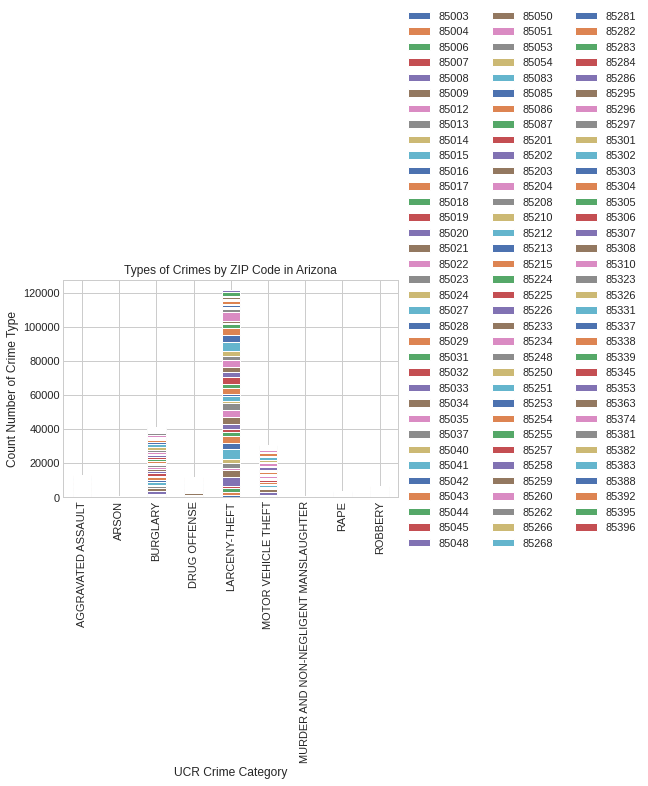

In [ ]:
(Combined_ZIP.pivot_table(index='UCR_CRIME_CATEGORY', columns='ZIP', values='counts', aggfunc='sum', fill_value=0).plot.bar(stacked=True)).legend(loc='center left', bbox_to_anchor=(1.0, 1.0), ncol=len(Combined_ZIP.columns))
plt.figsize=(40,20)
plt.title("Types of Crimes by ZIP Code in Arizona")
plt.xlabel("UCR Crime Category")
plt.ylabel("Count Number of Crime Type")

Scatter Plot

For the Scatter plot I was considering looking at the population and comparing it to the crime location.

In [ ]:
Combined.head()

INC_NUMBER        OCCURRED_ON  ...     PREMISE_TYPE    POP
0  201500002168686  11/01/2015  00:00  ...      PARKING LOT  27623
1  201500002102327  11/01/2015  00:00  ...        APARTMENT  27623
2  201500002100875  11/01/2015  02:38  ...  FAST FOOD STORE  27623
3  201500002101372  11/01/2015  06:10  ...      PARKING LOT  27623
4  201500002109004  11/02/2015  09:30  ...        APARTMENT  27623

[5 rows x 8 columns]

In [ ]:
Combined_Type = Combined.groupby(['ZIP', 'POP']).size().reset_index(name='counts')
Combined_Type

ZIP    POP  counts
0    85003   8499    2746
1    85004   7164    2653
2    85006  27206    4437
3    85007  14428    3536
4    85008  62340    9680
5    85009  51711    9853
6    85012   7492    1517
7    85013  21028    4641
8    85014  27623    4077
9    85015  41895   10638
10   85016  35930    6253
11   85017  42656    8742
12   85018  38473    4377
13   85019  27813    5498
14   85020  35361    5279
15   85021  43378    8015
16   85022  51920    6646
17   85023  34268    7222
18   85024  24834    1665
19   85027  37873    4967
20   85028  19334    1412
21   85029  47080    7225
22   85031  33886    5021
23   85032  73203    7224
24   85033  64832    7116
25   85034   5045    4704
26   85035  59660    7863
27   85037  54817    5168
28   85040  35204    6815
29   85041  62152   10526
..     ...    ...     ...
74   85286  44885       3
75   85295  47791       2
76   85296  44564       2
77   85297  33868       1
78   85301  68579      50
79   85302  40186      14
80   85303  35142      15
81   85304  28113     459
82   85305  13370       3
83   85306  25520     817
84   85307  11108     470
85   85308  66706    1817
86   85310  20267     573
87   85323  43968       9
88   85326  63317       2
89   85331  30727     596
90   85337   2626       1
91   85338  50122       6
92   85339  47958    4033
93   85345  57351       3
94   85353  42801    2313
95   85363   6802       3
96   85374  48430       1
97   85381  24997       1
98   85382  38890       5
99   85383  55327       5
100  85388  30817       2
101  85392  39054       9
102  85395  30491       3
103  85396  20905      13

[104 rows x 3 columns]

In [ ]:
Combined_POP = Combined.groupby(['POP', 'PREMISE_TYPE']).size().reset_index(name='counts')
Combined_POP

POP                          PREMISE_TYPE  counts
0      2626                               VEHICLE       1
1      5045         ABANDONED/CONDEMNED STRUCTURE       6
2      5045              ADULT ONLY STORE / MOVIE      12
3      5045                               AIRPORT    1014
4      5045                                 ALLEY       7
5      5045                        AMUSEMENT PARK       1
6      5045                             APARTMENT     405
7      5045   ARENA / STADIUM / CONVENTION CENTER       2
8      5045              AUTO DEALERSHIP NEW/USED      29
9      5045         BANK / SAVINGS / CREDIT UNION       4
10     5045              BAR / LOUNG / NIGHT CLUB      18
11     5045                                   BUS      15
12     5045                      BUS / LIGHT RAIL       4
13     5045                    BUS / RAIL STATION       8
14     5045                          BUS FACILITY       4
15     5045                           BUS STATION      28
16     5045                              BUS STOP      44
17     5045                               CARPORT       4
18     5045                 CHILD CARE / DAY CARE       1
19     5045  CHURCH / SYNAGOGUE / TEMPLE / MOSQUE      16
20     5045                      COMMUNITY CENTER       6
21     5045                     CONDO / TOWNHOUSE      18
22     5045                     CONSTRUCTION SITE      35
23     5045            CONVENIENCE MARKET / STORE     174
24     5045                            CYBERSPACE       2
25     5045           DEPARTMENT / DISCOUNT STORE      38
26     5045     DOCK/WHARF/FREIGHT/MODAL TERMINAL       1
27     5045                              DRIVEWAY      22
28     5045                            DRUG STORE       1
29     5045                       FAST FOOD STORE      32
...     ...                                   ...     ...
3439  73203          OFFICE / COMMERCIAL BUILDING      77
3440  73203                   OPEN SPACE / DESERT       8
3441  73203                                 OTHER     131
3442  73203                     PARK / PLAYGROUND      67
3443  73203                         PARK AND RIDE       2
3444  73203                        PARKING GARAGE      26
3445  73203                           PARKING LOT     629
3446  73203                          RAIL STATION       1
3447  73203             RENTAL STORAGE / FACILITY      76
3448  73203                            RESTAURANT      73
3449  73203                       RETAIL BUSINESS     575
3450  73203                          RIVER BOTTOM       2
3451  73203             SCHOOL-COLLEGE/UNIVERSITY      17
3452  73203           SCHOOL-ELEMENTARY/SECONDARY      47
3453  73203                          SCHOOL-OTHER       2
3454  73203             SCHOOL/COLLEGE/CHILD CARE      13
3455  73203                         SHOPPING MALL      49
3456  73203                   SINGLE FAMILY HOUSE    1325
3457  73203                 SINGLE FAMILY HOUSING      74
3458  73203                       SPECIALTY STORE     155
3459  73203                      STOREROOM / SHED       3
3460  73203           STOREROOM/SHED (COMMERCIAL)      22
3461  73203          STOREROOM/SHED (RESIDENTIAL)      13
3462  73203   STREET / ROADWAY / ALLEY / SIDEWALK     417
3463  73203     STREET / ROADWAY / ALLEY SIDEWALK      17
3464  73203           STREET / ROADWAY / SIDEWALK     147
3465  73203                               THEATRE       7
3466  73203                               UNKNOWN      26
3467  73203                               VEHICLE     311
3468  73203                   WAREHOUSE / FACTORY       3

[3469 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instea

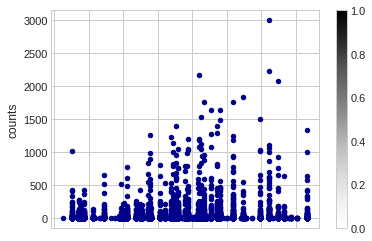

In [ ]:
Combined_POP.plot.scatter(x='POP', y='counts', c='Darkblue', colormap='viridis')

In [ ]:
Combined_Type['ZIP'] = Combined_Type['ZIP'].astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instea

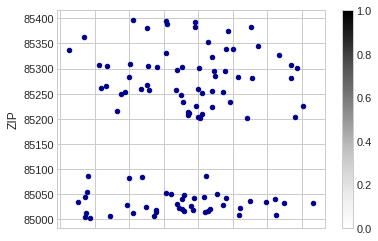

In [ ]:
Combined_Type.plot.scatter(x='POP', y='ZIP', c='Darkblue', colormap='viridis')